# Entrenamiento

## 1. Preprocesado

### 1.1. Lectura

In [30]:
import json
url, names, all_dictionaries = "./../generated/ml/models/", [ 'dictionary_manual_values.json' ], {}

for name in names:
    destiny = url + name.replace(' ', '%20')
    try:
        f = open(destiny, 'rb')
        all_dictionaries=json.loads(f.read())
    except OSError:
        print("No hay diccionario previo")
        all_dictionaries={}

In [31]:
all_dictionaries

{'make': {'ALFA ROMEO': 500,
  'AUDI': 1500,
  'MAZDA': 2500,
  'BMW': 3500,
  'CITROEN': 4500,
  'DACIA': 5500,
  'FIAT': 6500,
  'FORD': 7500,
  'HONDA': 8500,
  'HYUNDAI': 9500,
  'JAGUAR': 10500,
  'JEEP': 11500,
  'KIA': 12500,
  'LEXUS': 13500,
  'MERCEDES-BENZ': 14500,
  'MITSUBISHI': 15500,
  'MINI': 16500,
  'NISSAN': 17500,
  'PORSCHE': 18500,
  'OPEL': 19500,
  'SKODA': 20500,
  'PEUGEOT': 21500,
  'VOLVO': 22500,
  'RENAULT': 23500,
  'SEAT': 24500,
  'TOYOTA': 25500,
  'VOLKSWAGEN': 26500},
 'transmissionType': {'COMMON.TRANSMISSION_AUTOMATIC': 0,
  'COMMON.TRANSMISSION_MANUAL': 1},
 'seller_type': {'profesional': 0},
 'bodyType': {'BODY_TYPE_4X4': 500,
  'BODY_TYPE_SEDAN': 700,
  'BODY_TYPE_CABRIO': 900,
  'BODY_TYPE_FAMILIAR': 1100,
  'BODY_TYPE_COUPE': 1300,
  'BODY_TYPE_MINIVAN': 1500}}

In [32]:
import pandas as pd

url, names, dataframes = "./../generated/ml/preprocess/", [ 'all.csv' ], []

for name in names:
  destiny = url + name.replace(' ', '%20')
  print('Cargando: ' + destiny)
  if 'csv' in name:
    dataframes.append(pd.read_csv(destiny, delimiter=',', decimal=".", thousands=None))
  else:
    dataframes.append(pd.read_json(destiny))

Cargando: ./../generated/ml/preprocess/all.csv


In [33]:
all = pd.concat(dataframes)

### 1.2. Procesado de datos nulos

In [34]:
print("Datos iniciales | Longitud: {} | Num Columns: {}".format(len(all), len(all.columns)))
all=all.dropna(axis=1,how='all')
print("Eliminados na or null on columns | Longitud: {} | Num Columns: {}".format(len(all), len(all.columns)))
all=all.dropna(axis=0)
print("Eliminados na or null on rows | Longitud: {} | Num Columns: {}".format(len(all), len(all.columns)))
all=all.drop_duplicates()
all=all.drop_duplicates(subset=['id'], keep='first')
print("Eliminados duplicados | Longitud: {} | Num Columns: {}".format(len(all), len(all.columns)))
print("Datos finales | Longitud: {} | Num Columns: {}".format(len(all), len(all.columns)))

Datos iniciales | Longitud: 5086 | Num Columns: 36
Eliminados na or null on columns | Longitud: 5086 | Num Columns: 36
Eliminados na or null on rows | Longitud: 5086 | Num Columns: 36
Eliminados duplicados | Longitud: 5086 | Num Columns: 36
Datos finales | Longitud: 5086 | Num Columns: 36


### 1.3. Procesado columnas

In [35]:
all.columns

Index(['color', 'fuelTypeId', 'id', 'km', 'make', 'makeId', 'province',
       'provinceId', 'title', 'transmissionType', 'transmissionTypeId', 'year',
       'brand', 'brand_id', 'model', 'model_id', 'price', 'seller_type',
       'bodyType', 'cubicCapacity', 'doors', 'hp', 'acceleration',
       'consumptionAverage', 'consumptionExtraUrban', 'consumptionUrban',
       'emissions', 'fuelTankCapacity', 'height', 'length', 'luggageCapacity',
       'manufacturerPrice', 'seats', 'topSpeed', 'weight', 'width'],
      dtype='object')

<AxesSubplot:>

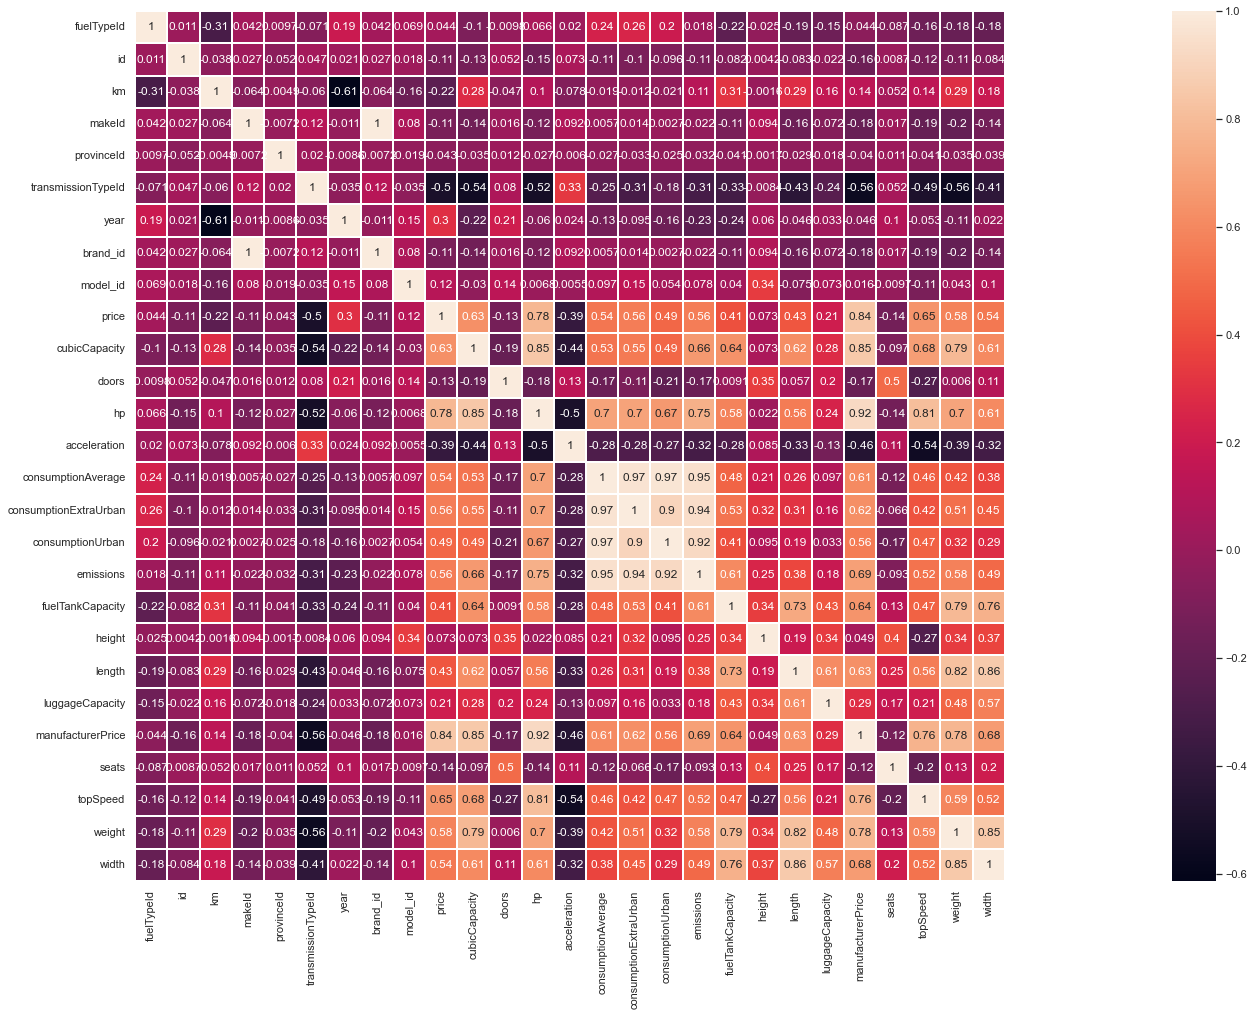

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(60,16))
sns.set()
sns.heatmap(all.corr(), square=True, annot=True,linewidths=0.1)

In [37]:
columns_to_drop=['id','color','fuelTypeId','makeId','province','provinceId','title','transmissionTypeId','brand_id','luggageCapacity','consumptionAverage','consumptionExtraUrban','model_id','manufacturerPrice','seats','weight','emissions','fuelTankCapacity','height','luggageCapacity','brand','doors','topSpeed','consumptionUrban','model']
all=all.drop(columns_to_drop, axis = 1)

In [38]:
all.columns

Index(['km', 'make', 'transmissionType', 'year', 'price', 'seller_type',
       'bodyType', 'cubicCapacity', 'hp', 'acceleration', 'length', 'width'],
      dtype='object')

In [39]:
all.head(2)

,km,make,transmissionType,year,price,seller_type,bodyType,cubicCapacity,hp,acceleration,length,width
0,79990,ALFA ROMEO,COMMON.TRANSMISSION_AUTOMATIC,2018,29490,profesional,BODY_TYPE_4X4,2143.0,160.0,8.8,4687.0,1903.0
1,91718,ALFA ROMEO,COMMON.TRANSMISSION_AUTOMATIC,2018,30500,profesional,BODY_TYPE_4X4,2143.0,190.0,7.6,4687.0,1903.0


In [40]:
def columns_numeric_type(df,columns_names):
  for columns_name in columns_names:
    df[column_name]=pd.to_numeric(df[column_name])
  return df

In [41]:
qualitative_variable_names = [ e for e in all.select_dtypes(['object']).columns ]
for column_name in qualitative_variable_names:
  print(column_name, len(all[column_name].unique()))

make 27
transmissionType 2
seller_type 1
bodyType 6


In [42]:
import operator

def replace_for_numeric(df,column_name,initial,increaser,value_dictionary={}):
  values=df[column_name].unique()
  pos=initial
  if len(value_dictionary) > 0:
    max_dictionary=max(value_dictionary.items(), key=operator.itemgetter(1))[1]
  else:
    max_dictionary=initial
  if max_dictionary > pos:
    pos=max_dictionary+increaser
  for value in values:
    if value not in value_dictionary:
      value_dictionary[value]=pos
      df.loc[df[column_name] == value, column_name] = pos
      pos=pos+increaser
    else:
      df.loc[df[column_name] == value, column_name] = value_dictionary[value]
  df[column_name]=pd.to_numeric(df[column_name])
  # print("Nuevos valores: ", df[column_name].unique())
  return df,value_dictionary

In [43]:
all.select_dtypes(['object']).columns

Index(['make', 'transmissionType', 'seller_type', 'bodyType'], dtype='object')

In [44]:
all,word_dictionary=replace_for_numeric(all,'make',500,1000,all_dictionaries.get('make', {}))
all_dictionaries['make']=word_dictionary
all,word_dictionary=replace_for_numeric(all,'transmissionType',0,1,all_dictionaries.get('transmissionType', {}))
all_dictionaries['transmissionType']=word_dictionary
all,word_dictionary=replace_for_numeric(all,'seller_type',0,1,all_dictionaries.get('seller_type', {}))
all_dictionaries['seller_type']=word_dictionary
all,word_dictionary=replace_for_numeric(all,'bodyType',500,200,all_dictionaries.get('bodyType', {}))
all_dictionaries['bodyType']=word_dictionary
print(all_dictionaries)

{'make': {'ALFA ROMEO': 500, 'AUDI': 1500, 'MAZDA': 2500, 'BMW': 3500, 'CITROEN': 4500, 'DACIA': 5500, 'FIAT': 6500, 'FORD': 7500, 'HONDA': 8500, 'HYUNDAI': 9500, 'JAGUAR': 10500, 'JEEP': 11500, 'KIA': 12500, 'LEXUS': 13500, 'MERCEDES-BENZ': 14500, 'MITSUBISHI': 15500, 'MINI': 16500, 'NISSAN': 17500, 'PORSCHE': 18500, 'OPEL': 19500, 'SKODA': 20500, 'PEUGEOT': 21500, 'VOLVO': 22500, 'RENAULT': 23500, 'SEAT': 24500, 'TOYOTA': 25500, 'VOLKSWAGEN': 26500}, 'transmissionType': {'COMMON.TRANSMISSION_AUTOMATIC': 0, 'COMMON.TRANSMISSION_MANUAL': 1}, 'seller_type': {'profesional': 0}, 'bodyType': {'BODY_TYPE_4X4': 500, 'BODY_TYPE_SEDAN': 700, 'BODY_TYPE_CABRIO': 900, 'BODY_TYPE_FAMILIAR': 1100, 'BODY_TYPE_COUPE': 1300, 'BODY_TYPE_MINIVAN': 1500}}


### 1.4.1. Muestra de datos finales

In [45]:
all.columns

Index(['km', 'make', 'transmissionType', 'year', 'price', 'seller_type',
       'bodyType', 'cubicCapacity', 'hp', 'acceleration', 'length', 'width'],
      dtype='object')

In [46]:
all.tail(1)

,km,make,transmissionType,year,price,seller_type,bodyType,cubicCapacity,hp,acceleration,length,width
5085,66760,26500,0,2019,36099,0,500,1968.0,190.0,7.9,4486.0,1839.0


### 1.4.2. Exportado de datos para aws

In [47]:
all.to_csv('./../generated/ml/aws_preprocess/all_aws.csv', index=False)

### 1.5. Split

In [48]:
from sklearn.model_selection import train_test_split as tts

all_x_data = all.drop('price', axis = 1)
all_y_data = all['price']

x_train, x_test, y_train, y_test = tts(all_x_data, all_y_data, random_state = 1, test_size = 0.20)

def print_bests(results, limit=5):
  best_results=sorted(results, key = lambda x: x.get('score'), reverse=True)[:limit]
  for best_result in best_results:
    print("score: {} | model_name: {}".format(best_result.get('score'), best_result.get('model_name')))
  return best_results


max_i=50
max_i_min=30

## 2. Entrenamientos

### 2.2. Entrenamiento KNN

In [49]:
from sklearn.neighbors import KNeighborsRegressor

def calc(k, w, a, x_train_knn, y_train_knn, x_test_knn, y_test_knn):
  model = KNeighborsRegressor(k, weights=w, algorithm=a)
  model.fit(x_train_knn, y_train_knn)
  return {'k': k, 'w': w, 'a': a, 'score': model.score(x_test_knn, y_test_knn), 'model': model, 'model_name': model.__class__.__name__}

knn_scores = []
for i in range(1, max_i):
  knn_scores.append(calc(i, 'uniform', 'ball_tree', x_train, y_train, x_test, y_test))
  knn_scores.append(calc(i, 'uniform', 'kd_tree', x_train, y_train, x_test, y_test))
  knn_scores.append(calc(i, 'uniform', 'brute', x_train, y_train, x_test, y_test))
  knn_scores.append(calc(i, 'distance', 'ball_tree', x_train, y_train, x_test, y_test))
  knn_scores.append(calc(i, 'distance', 'kd_tree', x_train, y_train, x_test, y_test))
  knn_scores.append(calc(i, 'distance', 'brute', x_train, y_train, x_test, y_test))

knn_models=print_bests(knn_scores)

score: 0.5230604336577522 | model_name: KNeighborsRegressor
score: 0.5230604336577522 | model_name: KNeighborsRegressor
score: 0.5230501480915593 | model_name: KNeighborsRegressor
score: 0.5111420866115792 | model_name: KNeighborsRegressor
score: 0.5111420866115792 | model_name: KNeighborsRegressor


### 2.3. Entrenamiento Tree Decision

In [50]:
from sklearn.tree import DecisionTreeRegressor

def calc(c, d, x_train_tree, y_train_tree, x_test_tree, y_test_tree):
  model = DecisionTreeRegressor(criterion=c, max_depth=d)
  model.fit(x_train_tree, y_train_tree)
  return {'c': c, 'd': d, 'score': model.score(x_test_tree, y_test_tree), 'model': model, 'model_name': model.__class__.__name__}

tree_scores = []
for i in range(1, max_i):
  tree_scores.append(calc('absolute_error', i, x_train, y_train, x_test, y_test))
  tree_scores.append(calc('squared_error', i, x_train, y_train, x_test, y_test))
  tree_scores.append(calc('poisson', i, x_train, y_train, x_test, y_test))
  tree_scores.append(calc('friedman_mse', i, x_train, y_train, x_test, y_test))

tree_models=print_bests(tree_scores)

score: 0.8312268743352813 | model_name: DecisionTreeRegressor
score: 0.829956537390306 | model_name: DecisionTreeRegressor
score: 0.828866092866234 | model_name: DecisionTreeRegressor
score: 0.8286452021439119 | model_name: DecisionTreeRegressor
score: 0.8281903926769154 | model_name: DecisionTreeRegressor


### 2.4. Entrenamiento Random Forest

In [51]:
from sklearn.ensemble import RandomForestRegressor

def calc(cr, n_s, x_train_tree, y_train_tree, x_test_tree, y_test_tree):
  model = RandomForestRegressor(n_estimators=n_s, criterion=cr, random_state=1)
  model.fit(x_train_tree, y_train_tree)
  return {'n_s': n_s, 'cr': cr, 'score': model.score(x_test_tree, y_test_tree), 'model': model, 'model_name': model.__class__.__name__}

forest_scores = []
for i in range(1, max_i_min):
  forest_scores.append(calc('poisson', i, x_train, y_train, x_test, y_test))
  forest_scores.append(calc('absolute_error', i, x_train, y_train, x_test, y_test))
  forest_scores.append(calc('squared_error', i, x_train, y_train, x_test, y_test))

forest_models=print_bests(forest_scores)

score: 0.9167963932192837 | model_name: RandomForestRegressor
score: 0.9160547645175842 | model_name: RandomForestRegressor
score: 0.9153670047851042 | model_name: RandomForestRegressor
score: 0.9153446943800544 | model_name: RandomForestRegressor
score: 0.9150282732821546 | model_name: RandomForestRegressor


### 2.5. Entrenamiento LinearRegression

In [52]:
from sklearn.linear_model import LinearRegression

def calc(p, f_i, x_train_tree, y_train_tree, x_test_tree, y_test_tree):
  model = LinearRegression(fit_intercept=f_i,positive=p)
  model.fit(x_train_tree, y_train_tree)
  return {'p': p, 'f_i': f_i, 'score': model.score(x_test_tree, y_test_tree), 'model': model, 'model_name': model.__class__.__name__}

l_n_scores = []
l_n_scores.append(calc(True, True, x_train, y_train, x_test, y_test))
l_n_scores.append(calc(False, True, x_train, y_train, x_test, y_test))
l_n_scores.append(calc(True, False, x_train, y_train, x_test, y_test))
l_n_scores.append(calc(False, False, x_train, y_train, x_test, y_test))

l_n_models=print_bests(l_n_scores)

score: 0.7809137796873569 | model_name: LinearRegression
score: 0.7498152017490134 | model_name: LinearRegression
score: 0.7298070079211316 | model_name: LinearRegression
score: 0.5923684517854851 | model_name: LinearRegression


### 2.6. Entrenamiento AdaBoostRegressor

In [53]:
from sklearn.ensemble import AdaBoostRegressor

def calc(loss, n_s, x_train_tree, y_train_tree, x_test_tree, y_test_tree):
  model = AdaBoostRegressor(n_estimators=n_s, loss=loss, random_state=1)
  model.fit(x_train_tree, y_train_tree)
  return {'n_s': n_s, 'loss': loss, 'score': model.score(x_test_tree, y_test_tree), 'model': model, 'model_name': model.__class__.__name__}

abr_scores = []
for i in range(1, max_i):
  abr_scores.append(calc('exponential', i, x_train, y_train, x_test, y_test))
  abr_scores.append(calc('linear', i, x_train, y_train, x_test, y_test))
  abr_scores.append(calc('exponential', i, x_train, y_train, x_test, y_test))

abr_models=print_bests(abr_scores)

score: 0.7611766208014493 | model_name: AdaBoostRegressor
score: 0.7611766208014493 | model_name: AdaBoostRegressor
score: 0.7588215796914559 | model_name: AdaBoostRegressor
score: 0.7588215796914559 | model_name: AdaBoostRegressor
score: 0.7566090315848686 | model_name: AdaBoostRegressor


### 2.7. Entrenamiento GradientBoostingRegressor

In [54]:
from sklearn.ensemble import GradientBoostingRegressor

def calc(cr, loss, n_s, x_train_tree, y_train_tree, x_test_tree, y_test_tree):
  model = GradientBoostingRegressor(n_estimators=n_s, criterion=cr, loss=loss, random_state=1)
  model.fit(x_train_tree, y_train_tree)
  return {'n_s': n_s, 'cr': cr, 'loss': loss, 'score': model.score(x_test_tree, y_test_tree), 'model': model, 'model_name': model.__class__.__name__}

gbr_scores = []
for i in range(1, max_i):
  gbr_scores.append(calc('friedman_mse', 'quantile', i, x_train, y_train, x_test, y_test))
  gbr_scores.append(calc('friedman_mse', 'huber', i, x_train, y_train, x_test, y_test))
  gbr_scores.append(calc('friedman_mse', 'absolute_error', i, x_train, y_train, x_test, y_test))
  gbr_scores.append(calc('friedman_mse', 'squared_error', i, x_train, y_train, x_test, y_test))
  gbr_scores.append(calc('squared_error', 'quantile', i, x_train, y_train, x_test, y_test))
  gbr_scores.append(calc('squared_error', 'huber', i, x_train, y_train, x_test, y_test))
  gbr_scores.append(calc('squared_error', 'absolute_error', i, x_train, y_train, x_test, y_test))
  gbr_scores.append(calc('squared_error', 'squared_error', i, x_train, y_train, x_test, y_test))

gbr_models=print_bests(gbr_scores)

score: 0.9032537837954359 | model_name: GradientBoostingRegressor
score: 0.9032537837954359 | model_name: GradientBoostingRegressor
score: 0.9027176218260802 | model_name: GradientBoostingRegressor
score: 0.9027176218260802 | model_name: GradientBoostingRegressor
score: 0.9018158052125621 | model_name: GradientBoostingRegressor


## 3. Resultados

In [55]:
best_results=gbr_models+abr_models+l_n_models+forest_models+tree_models+knn_models

best_results=print_bests(best_results,5)

score: 0.9167963932192837 | model_name: RandomForestRegressor
score: 0.9160547645175842 | model_name: RandomForestRegressor
score: 0.9153670047851042 | model_name: RandomForestRegressor
score: 0.9153446943800544 | model_name: RandomForestRegressor
score: 0.9150282732821546 | model_name: RandomForestRegressor


In [56]:
best_results_each_model=[gbr_models[0]]+[abr_models[0]]+[l_n_models[0]]+[forest_models[0]]+[tree_models[0]]+[knn_models[0]]

best_results_each_model=print_bests(best_results_each_model,10)

score: 0.9167963932192837 | model_name: RandomForestRegressor
score: 0.9032537837954359 | model_name: GradientBoostingRegressor
score: 0.8312268743352813 | model_name: DecisionTreeRegressor
score: 0.7809137796873569 | model_name: LinearRegression
score: 0.7611766208014493 | model_name: AdaBoostRegressor
score: 0.5230604336577522 | model_name: KNeighborsRegressor


In [57]:
best_results_to_export=best_results+best_results_each_model
best_results_to_export=print_bests(best_results_to_export,100)

score: 0.9167963932192837 | model_name: RandomForestRegressor
score: 0.9167963932192837 | model_name: RandomForestRegressor
score: 0.9160547645175842 | model_name: RandomForestRegressor
score: 0.9153670047851042 | model_name: RandomForestRegressor
score: 0.9153446943800544 | model_name: RandomForestRegressor
score: 0.9150282732821546 | model_name: RandomForestRegressor
score: 0.9032537837954359 | model_name: GradientBoostingRegressor
score: 0.8312268743352813 | model_name: DecisionTreeRegressor
score: 0.7809137796873569 | model_name: LinearRegression
score: 0.7611766208014493 | model_name: AdaBoostRegressor
score: 0.5230604336577522 | model_name: KNeighborsRegressor


## 4. Guardado de modelos

In [58]:
import pickle
import json

for i in range(len(best_results_to_export)):
  model_to_save = best_results_to_export[i]
  with open("./../generated/ml/models/learners/" + str(i) + "_" + model_to_save.get('model_name') + ".pkl", "wb") as file:
    pickle.dump(model_to_save['model'], file)

with open("./../generated/ml/models/dictionary_manual_values.json", "w") as file:
  file.write(json.dumps(all_dictionaries))